<a href="https://colab.research.google.com/github/Cdiezlop/ModelosIA-udea-20252-cristian-diez/blob/main/Laboratorios%20del%20curso/LAB%2005.02%20-%20MODEL%20EVALUATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LAB 05.02 - Model evaluation

In [1]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/ai4eng.v1/main/content/init.py
import init; init.init(force_download=False); init.get_weblink()


replicating local resources


In [2]:
from local.lib.rlxmoocapi import submit, session
session.LoginSequence(endpoint=init.endpoint, course_id=init.course_id, lab_id="L05.02", varname="student");

logging in as cristian.diez@udea.edu.co... please wait

-------------
using course session ai4eng.v1.udea.r3::2025.2
success!! you are logged in
-------------


## Task 1: Partition randomly `numpy` arrays

observe we can select specific rows and/or columns on a numpy array

In [3]:
import numpy as np

x = np.random.randint(100, size=(20,5))
x[:,0] = range(len(x))
x[0,:] = range(x.shape[1])
x

array([[ 0,  1,  2,  3,  4],
       [ 1, 61,  9,  1, 24],
       [ 2, 55, 75, 46, 63],
       [ 3, 60, 40, 13, 69],
       [ 4, 33, 98, 27, 19],
       [ 5, 47, 76, 87, 49],
       [ 6,  4, 40, 27, 69],
       [ 7, 82, 68, 95, 57],
       [ 8, 27, 71, 31, 10],
       [ 9, 33, 31, 72, 27],
       [10, 96, 65, 92,  4],
       [11, 37, 74, 16,  9],
       [12, 50, 51,  4, 13],
       [13, 16, 16, 56, 50],
       [14, 39, 13, 46, 66],
       [15,  5, 14, 23, 66],
       [16, 91, 10, 14, 49],
       [17, 90, 29, 41, 44],
       [18,  6, 21,  7,  8],
       [19, 28,  0, 92, 56]])

In [4]:
ridxs = np.r_[2,4,5]
x[ridxs]

array([[ 2, 55, 75, 46, 63],
       [ 4, 33, 98, 27, 19],
       [ 5, 47, 76, 87, 49]])

In [5]:
cidxs = np.r_[1,3]
x[:,cidxs]

array([[ 1,  3],
       [61,  1],
       [55, 46],
       [60, 13],
       [33, 27],
       [47, 87],
       [ 4, 27],
       [82, 95],
       [27, 31],
       [33, 72],
       [96, 92],
       [37, 16],
       [50,  4],
       [16, 56],
       [39, 46],
       [ 5, 23],
       [91, 14],
       [90, 41],
       [ 6,  7],
       [28, 92]])

In [6]:
x[ridxs][:, cidxs]

array([[55, 46],
       [33, 27],
       [47, 87]])

and the dimensions of the array are accessible through `len` and `shape`

In [7]:
len(x), x.shape

(20, (20, 5))

observe also how we can partition it

In [8]:
x[:3]

array([[ 0,  1,  2,  3,  4],
       [ 1, 61,  9,  1, 24],
       [ 2, 55, 75, 46, 63]])

In [9]:
x[3:]

array([[ 3, 60, 40, 13, 69],
       [ 4, 33, 98, 27, 19],
       [ 5, 47, 76, 87, 49],
       [ 6,  4, 40, 27, 69],
       [ 7, 82, 68, 95, 57],
       [ 8, 27, 71, 31, 10],
       [ 9, 33, 31, 72, 27],
       [10, 96, 65, 92,  4],
       [11, 37, 74, 16,  9],
       [12, 50, 51,  4, 13],
       [13, 16, 16, 56, 50],
       [14, 39, 13, 46, 66],
       [15,  5, 14, 23, 66],
       [16, 91, 10, 14, 49],
       [17, 90, 29, 41, 44],
       [18,  6, 21,  7,  8],
       [19, 28,  0, 92, 56]])

we can do the same thing with vectors

In [10]:
v = np.arange(100,120)
v

array([100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
       113, 114, 115, 116, 117, 118, 119])

In [11]:
v[:5], v[5:]

(array([100, 101, 102, 103, 104]),
 array([105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
        118, 119]))

finally, observe how we can create a random permutation of a specific vector

In [12]:
np.random.permutation(v)

array([119, 101, 103, 107, 105, 109, 111, 104, 114, 108, 118, 113, 117,
       115, 116, 106, 110, 100, 102, 112])

or the first natural numbers

In [13]:
p = np.random.permutation(20)
p

array([ 7, 19,  8, 17,  2, 14, 10, 11, 13,  9,  1,  6,  3, 16,  4, 15, 12,
       18,  5,  0])

how do you interpret this?

In [14]:
v[p[5:]]

array([114, 110, 111, 113, 109, 101, 106, 103, 116, 104, 115, 112, 118,
       105, 100])

In [15]:
x[p[:5]]

array([[ 7, 82, 68, 95, 57],
       [19, 28,  0, 92, 56],
       [ 8, 27, 71, 31, 10],
       [17, 90, 29, 41, 44],
       [ 2, 55, 75, 46, 63]])

### assignment

in this task you will have to complete the function  `split_data` below so that:

- it accepts two arguments `X` and `y`, either of which can be any numpy array (1D, 2D, etc.) of the **same** size $n$ (observe the  `assert` statement), and a `pct`
- creates a random permutation of the natural number from $0$ to $n-1$
- partitions the permutations so that the first partition contains the first `n1_elements` $=$ `int(n * pct)` numbers, and the second partition the rest
- interpret the permutation partitions components as indexes to `X` and `y` so that they are partitioned into `X1`, `X2` and `y1`, `y2` respectively

note that **indexes to array** must be of type `int`. do the following to convert a float to int

In [16]:
a,b = 10,.3
c = a*b
print (c)
c = int(c)
print(c)

3.0
3


In [17]:
def split_data(X, y, pct):
    assert len(X)==len(y), "X and y must have the same length"
    assert pct>0 and pct<1, "pct must be in the (0,1) interval"

    n = len(X)
    permutation = np.random.permutation(n)
    n1_elements = int(n * pct)
    permutation_partition_1 = permutation[:n1_elements]
    permutation_partition_2 = permutation[n1_elements:]
    X1 = X[permutation_partition_1]
    X2 = X[permutation_partition_2]
    y1 = y[permutation_partition_1]
    y2 = y[permutation_partition_2]
    return X1, X2, y1, y2

check your solution manually with the following code

In [18]:
XX = np.random.randint(100, size=(20,8))
yy = np.arange(100,100+len(XX))
XX[:,0] = range(len(XX))
XX[0,:] = range(XX.shape[1])
print (XX)
print (yy)

[[ 0  1  2  3  4  5  6  7]
 [ 1 53 65 72 58 85 40 21]
 [ 2 29 23 22 23 53 53 77]
 [ 3 17 35 84 42 25 89 55]
 [ 4 10 97 32 29 47 40 39]
 [ 5 31 49  4 48 83 61 84]
 [ 6 54 30 85 64 69 29 87]
 [ 7 97 97 13 44 25 39 87]
 [ 8  2 69 99 46 97 61 47]
 [ 9 81 22 22 37  4 90 18]
 [10  3 91 47 75 31 40 24]
 [11 23 55 92 10 80 41 15]
 [12 92 44 92 83 48 73  6]
 [13 57 36 97 52 94  9 83]
 [14 54 68 59 78 51  4 58]
 [15 76 42 98  7 27 65 35]
 [16 47 22 91 98 13 82 39]
 [17 88 58 32  9 56  4 27]
 [18  2 91 35 39 23 24 58]
 [19 13 32 47 59 43  9 52]]
[100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119]


In [19]:
Xtr, Xts, ytr, yts = split_data(XX, yy, pct=.7)

In [20]:
# check partition ok
np.sum(XX), np.sum(Xtr) + np.sum(Xts), np.sum(yy), np.sum(ytr)+np.sum(yts)

(np.int64(6816), np.int64(6816), np.int64(2190), np.int64(2190))

In [21]:
print (Xtr, "\n--")
print (Xts, "\n--")
print (ytr, "\n--")
print (yts, "\n--")

[[12 92 44 92 83 48 73  6]
 [ 4 10 97 32 29 47 40 39]
 [14 54 68 59 78 51  4 58]
 [ 9 81 22 22 37  4 90 18]
 [ 2 29 23 22 23 53 53 77]
 [17 88 58 32  9 56  4 27]
 [19 13 32 47 59 43  9 52]
 [11 23 55 92 10 80 41 15]
 [13 57 36 97 52 94  9 83]
 [ 3 17 35 84 42 25 89 55]
 [18  2 91 35 39 23 24 58]
 [16 47 22 91 98 13 82 39]
 [10  3 91 47 75 31 40 24]
 [ 8  2 69 99 46 97 61 47]] 
--
[[ 6 54 30 85 64 69 29 87]
 [15 76 42 98  7 27 65 35]
 [ 5 31 49  4 48 83 61 84]
 [ 7 97 97 13 44 25 39 87]
 [ 0  1  2  3  4  5  6  7]
 [ 1 53 65 72 58 85 40 21]] 
--
[112 104 114 109 102 117 119 111 113 103 118 116 110 108] 
--
[106 115 105 107 100 101] 
--


In [22]:
Xts

array([[ 6, 54, 30, 85, 64, 69, 29, 87],
       [15, 76, 42, 98,  7, 27, 65, 35],
       [ 5, 31, 49,  4, 48, 83, 61, 84],
       [ 7, 97, 97, 13, 44, 25, 39, 87],
       [ 0,  1,  2,  3,  4,  5,  6,  7],
       [ 1, 53, 65, 72, 58, 85, 40, 21]])

**submit your code**

In [23]:
student.submit_task(globals(), task_id="task_01");


## Task 2: Fit a model and make predictions

observe how we create new data from synthetic datasets available in `sklearn`

In [24]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from local.lib import mlutils
%matplotlib inline

/content/local/lib/mlutils.py:445: SyntaxWarning: invalid escape sequence '\m'
  time_str = "fit time  (TRAIN)    %.2f $\mu$secs"%(fitting_time*1000)


In [25]:
X, y = make_moons(200, noise=0.2)
X.shape, y.shape

((200, 2), (200,))

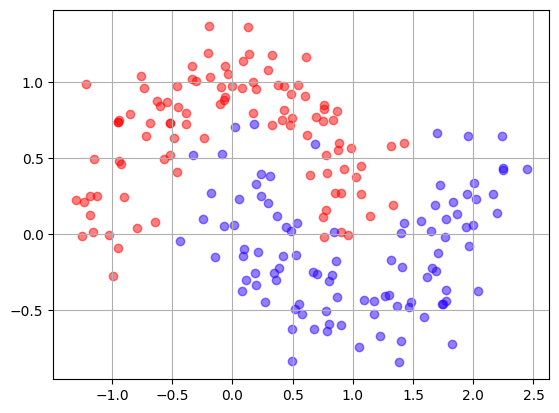

In [26]:
mlutils.plot_2Ddata(X,y); plt.grid();

observe also how we create an algorithm instance and fit a model

(np.float64(0.471175), np.float64(0.528825))

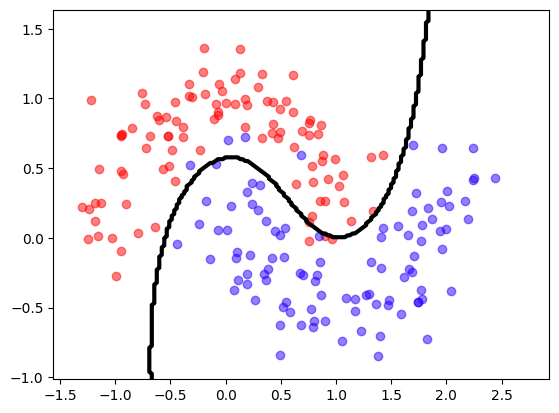

In [27]:
from sklearn.svm import SVC
estimator = SVC(gamma=1)
estimator.fit(X,y)
mlutils.plot_2Ddata_with_boundary(estimator.predict, X, y)

and how we make predictions

In [28]:
preds = estimator.predict(X)
print (preds.shape)
preds

(200,)


array([0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1])

in this task you have to complete the following function so that:

- it makes two non-random partitions of `X` and `y`. One containing the first half of the data and one containing the second part. If the number of elements of `X` is odd, then the second half will contain one more element than the first half.
- it fits the model with the first part of the data
- it makes predictions on the second half of the data
- returns the estimator fitted, and the predictions on the second half of the data.

In [29]:
def fit_and_predict(estimator, X, y):
    assert len(X)==len(y), "X and y must have the same length"

    # Dividir en primera mitad y segunda mitad
    n = len(X)
    split_point = n // 2

    X_train = X[:split_point]
    y_train = y[:split_point]
    X_test = X[split_point:]

    # Entrenar el modelo
    estimator.fit(X_train, y_train)

    # Predecir en la segunda mitad
    predictions = estimator.predict(X_test)

    return estimator, predictions

check your code. your predictions should be similar to

    preds
    >> array([0, 0, 0, 0, 1, 0, 1, 1, 1, 0])

In [30]:
X = np.array([[ 0.74799424, -0.5867667 ],
       [-0.64457753,  1.25127894],
       [ 0.53682593,  0.10931563],
       [-0.88825294, -0.06987509],
       [ 0.99612638, -0.52295157],
       [ 1.20586692,  0.01930477],
       [-0.19368482,  0.65121567],
       [ 0.1973759 ,  0.82250723],
       [ 0.94859234, -0.5457241 ],
       [ 1.87967948, -0.22740261],
       [ 0.58766146,  0.3982837 ],
       [ 0.27731571,  1.14369568],
       [-0.67421956,  0.12785382],
       [ 0.56957459,  1.05330376],
       [ 1.52435938, -0.29864338],
       [-0.15973608,  0.21790711],
       [ 1.59037406, -0.56875485],
       [ 0.43257507, -0.48900315],
       [ 1.09440413, -0.73789029],
       [-0.32940869,  0.74671384]])
y = np.array([1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0])
X.shape, y.shape

((20, 2), (20,))

In [31]:
from sklearn.linear_model import LogisticRegression
estimator = LogisticRegression()
estimator, preds = fit_and_predict(estimator, X, y)
preds

array([0, 0, 0, 0, 1, 0, 1, 1, 1, 0])

**submit your code**

In [32]:
student.submit_task(globals(), task_id="task_02");


## Task 3: Select data with indices

Observe how we can create a vector or matrix of `True/False` (boolean) by applying a condition to any matrix or vector

In [33]:
import numpy as np
y = np.random.randint(10, size=15)
print (y)

[2 8 0 4 8 3 6 5 6 2 3 6 1 4 1]


In [34]:
y_less_than_5 = y<5
print (y_less_than_5)

[ True False  True  True False  True False False False  True  True False
  True  True  True]


and how we can select elements of a vector using a boolean vector of the same length

In [35]:
y[y_less_than_5]

array([2, 0, 4, 3, 2, 3, 1, 4, 1])

In [36]:
y[y<5]

array([2, 0, 4, 3, 2, 3, 1, 4, 1])

python doesn't really care how you construct the vector of booleans to index any other vector or array

In [ ]:
v = np.random.randint(20, size=15)
v

In [ ]:
v[y<5]

in this task you will complete the function `select_per_class` such that:

- receives an array of data `X` and a vector of labels `y`, of the same length
- the labels `y` are binary, they can only have values `0` or `1`
- makes two partitions of `X`, one corresponding to the places where y is 0, and another where y is 1
- returns the two partitions

For instance, for the following X and y

    X = np.array([[8, 8, 5, 2, 0, 0],
                  [4, 4, 8, 1, 3, 7],
                  [4, 5, 3, 6, 9, 6],
                  [0, 3, 5, 3, 5, 3],
                  [0, 7, 2, 7, 1, 7],
                  [5, 7, 7, 1, 8, 5],
                  [2, 5, 7, 3, 8, 0],
                  [7, 2, 5, 9, 8, 7],
                  [1, 6, 6, 1, 6, 0],
                  [0, 7, 6, 5, 3, 4]])

    y = np.array([0, 0, 0, 0, 1, 1, 0, 0, 1, 1])

your function must return the following two matrices:

    [[8 8 5 2 0 0]
     [4 4 8 1 3 7]
     [4 5 3 6 9 6]
     [0 3 5 3 5 3]
     [2 5 7 3 8 0]
     [7 2 5 9 8 7]]
     
    [[0 7 2 7 1 7]
     [5 7 7 1 8 5]
     [1 6 6 1 6 0]
     [0 7 6 5 3 4]]


In [39]:
def select_per_class(X, y):
    X1 = X[y == 0]
    X2 = X[y == 1]
    return X1, X2

check manually your code

In [40]:
X = np.array([[8, 8, 5, 2, 0, 0],
              [4, 4, 8, 1, 3, 7],
              [4, 5, 3, 6, 9, 6],
              [0, 3, 5, 3, 5, 3],
              [0, 7, 2, 7, 1, 7],
              [5, 7, 7, 1, 8, 5],
              [2, 5, 7, 3, 8, 0],
              [7, 2, 5, 9, 8, 7],
              [1, 6, 6, 1, 6, 0],
              [0, 7, 6, 5, 3, 4]])

y = np.array([0, 0, 0, 0, 1, 1, 0, 0, 1, 1])

In [41]:
a,b = select_per_class(X, y)
print (a)
print (b)

[[8 8 5 2 0 0]
 [4 4 8 1 3 7]
 [4 5 3 6 9 6]
 [0 3 5 3 5 3]
 [2 5 7 3 8 0]
 [7 2 5 9 8 7]]
[[0 7 2 7 1 7]
 [5 7 7 1 8 5]
 [1 6 6 1 6 0]
 [0 7 6 5 3 4]]


**submit your code**

In [42]:
student.submit_task(globals(), task_id="task_03");


## Task 4: Measure accuracy

complete the following function such that:

- it receives to binary vectors (composed of 0's and 1's) of the same length
- returns the percentage of elements that are the same in both vectors

recall that

- if `a` and `b` are vectors of the same length a==b   returns a vector of booleans in which positions in True signal that elements in those position are the same
- if `k` is a vector of booleans, `sum(k)` returns the number of `True` elements.


for the following two vectors you should get 0.375

    a = np.array([1,0,0,0,1,1,0,0])
    b = np.array([1,1,1,1,0,1,0,1])
    accuracy(a, b)
    >>> 0.375


In [44]:
def accuracy(y_true, y_pred):
    result = np.mean(y_true == y_pred)
    return result

In [45]:
a = np.array([1,0,0,0,1,1,0,0])
b = np.array([1,1,1,1,0,1,0,1])
accuracy(a,b)

np.float64(0.375)

**submit your code**

In [46]:
student.submit_task(globals(), task_id="task_04");


## Task 5: Random split, fit and predict

complete the following function so that:

- fits the estimator with a random sample of size `train_pct` of the data `X` and binary labels `y`. You can use the `split_data` function developed previously
- makes predictions on the test part of the data
- measures accuracy of those predictions. you may use the function created previously
- returns the estimator fitted, the test part of `X` and `y`, and the accuracy measured


the execution below should return something with the following structure (the actual numbers will change)


    (LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                        intercept_scaling=1, l1_ratio=None, max_iter=100,
                        multi_class='warn', n_jobs=None, penalty='l2',
                        random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                        warm_start=False), array([[-0.76329684,  0.2572069 ],
            [ 1.02356829,  0.37629873],
            [ 0.32099415,  0.82244488],
            [ 1.08858315, -0.61299904],
            [ 0.58470767,  0.58510559],
            [ 1.60827644, -0.15477173],
            [ 1.53121784,  0.78121504],
            [-0.42734156,  0.87585237],
            [-0.36368682,  0.72152586],
            [ 1.05312619,  0.19835526]]), array([0, 0, 1, 1, 0, 1, 1, 0, 0, 0]), 0.6)

In [47]:

def split_fit_predict(estimator, X, y, train_pct):

    def split_data(X, y, pct):
        n = len(X)
        permutation = np.random.permutation(n)
        n1_elements = int(n * pct)
        permutation_partition_1 = permutation[:n1_elements]
        permutation_partition_2 = permutation[n1_elements:]
        X1 = X[permutation_partition_1]
        X2 = X[permutation_partition_2]
        y1 = y[permutation_partition_1]
        y2 = y[permutation_partition_2]
        return X1, X2, y1, y2

    def accuracy(y_true, y_pred):
        result = np.mean(y_true == y_pred)
        return result

    # Asegurarnos de que ambas particiones tengan ambas clases
    max_attempts = 10
    for attempt in range(max_attempts):
        Xtr, Xts, ytr, yts = split_data(X, y, train_pct)

        # Verificar que ambas particiones tengan al menos 2 clases
        if len(np.unique(ytr)) >= 2 and len(np.unique(yts)) >= 2:
            break
    else:
        # Si después de varios intentos no se logra, usar una estrategia estratificada
        from sklearn.model_selection import train_test_split
        Xtr, Xts, ytr, yts = train_test_split(X, y, train_size=train_pct, stratify=y)

    estimator.fit(Xtr, ytr)
    preds_ts = estimator.predict(Xts)
    return estimator, Xts, yts, accuracy(yts, preds_ts)

In [48]:
from sklearn.linear_model import LogisticRegression

X, y = make_moons(100, noise=0.2)
estimator = LogisticRegression(solver="lbfgs")
split_fit_predict(estimator, X, y, train_pct=0.9)


(LogisticRegression(),
 array([[ 1.75270337,  0.31123872],
        [-0.06917068, -0.01892994],
        [-0.57756164,  0.32806166],
        [-0.97187474,  0.96483432],
        [ 0.9821528 , -0.54799737],
        [-0.23358141,  1.10337993],
        [ 0.45385339, -0.4656541 ],
        [ 0.86410068,  0.62375691],
        [ 0.7560905 , -0.45636345],
        [ 1.8753558 , -0.34000612]]),
 array([1, 1, 0, 0, 1, 0, 1, 0, 1, 1]),
 np.float64(1.0))

**submit your code**

In [49]:
student.submit_task(globals(), task_id="task_05");
